In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive (13)\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Flag                      768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

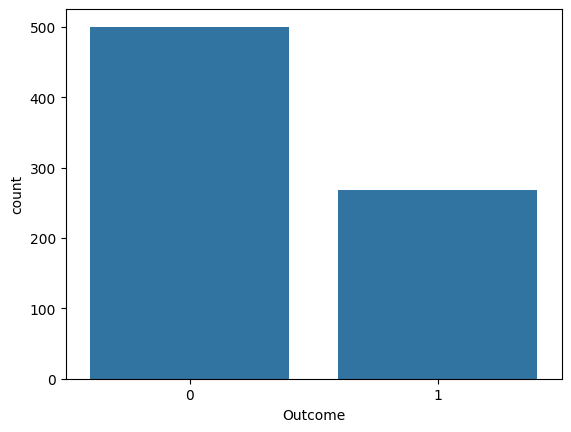

In [18]:
sns.countplot(df,x='Outcome')

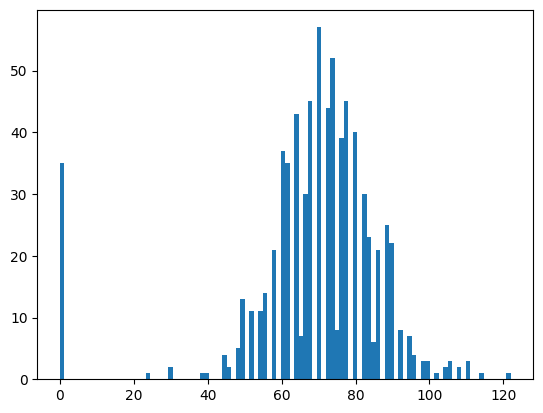

In [74]:
plt.hist(df['BloodPressure'],bins=100)
plt.show()

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
col = df.drop('Outcome',axis=1)
col.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

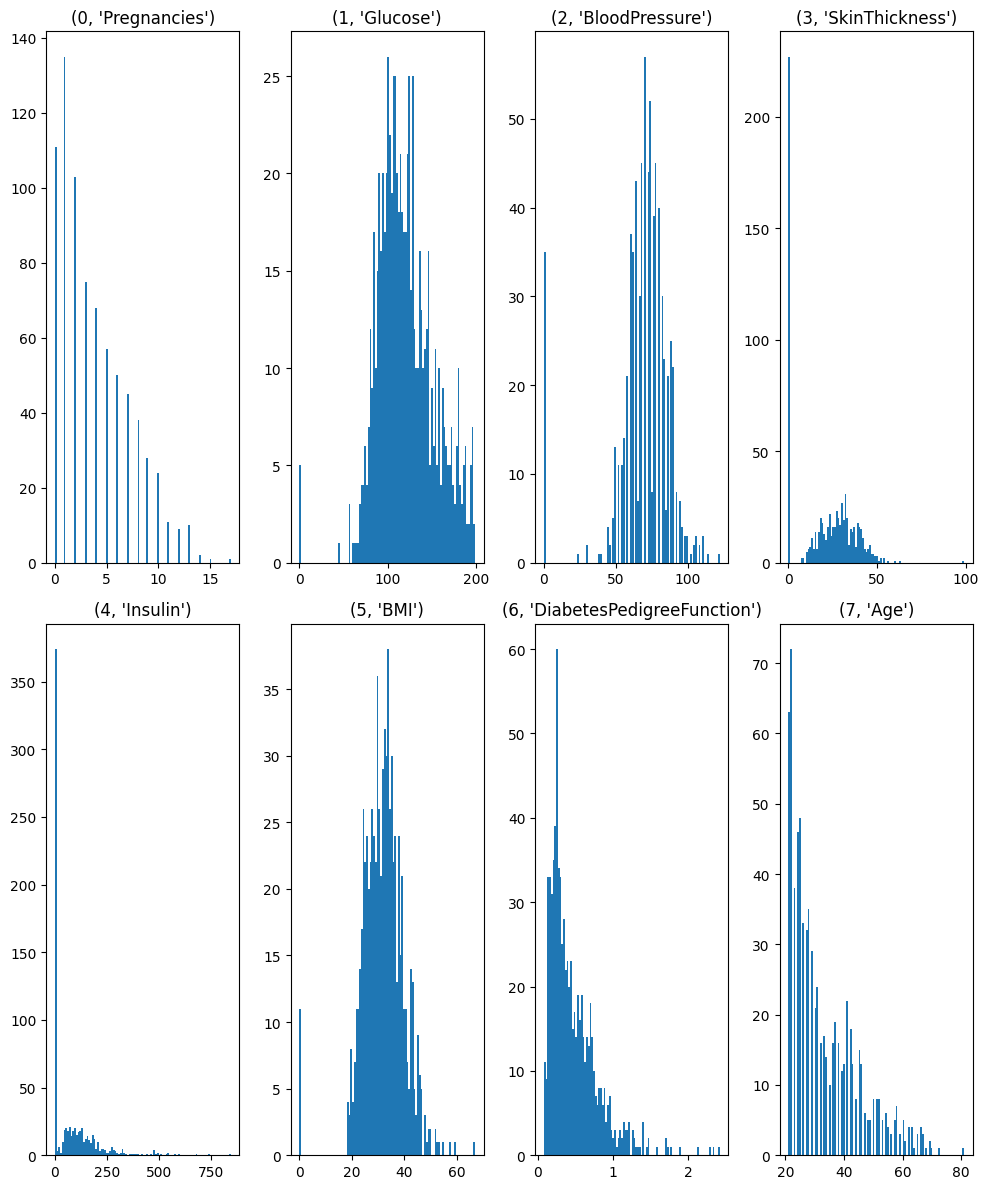

In [75]:
plt.figure(figsize=(10,12))
for i in list(enumerate(col.columns)):
    plt.subplot(2, 4, i[0]+1)
    plt.hist(x=col[i[1]],bins=100)
    plt.title(i)
plt.tight_layout()
plt.show()

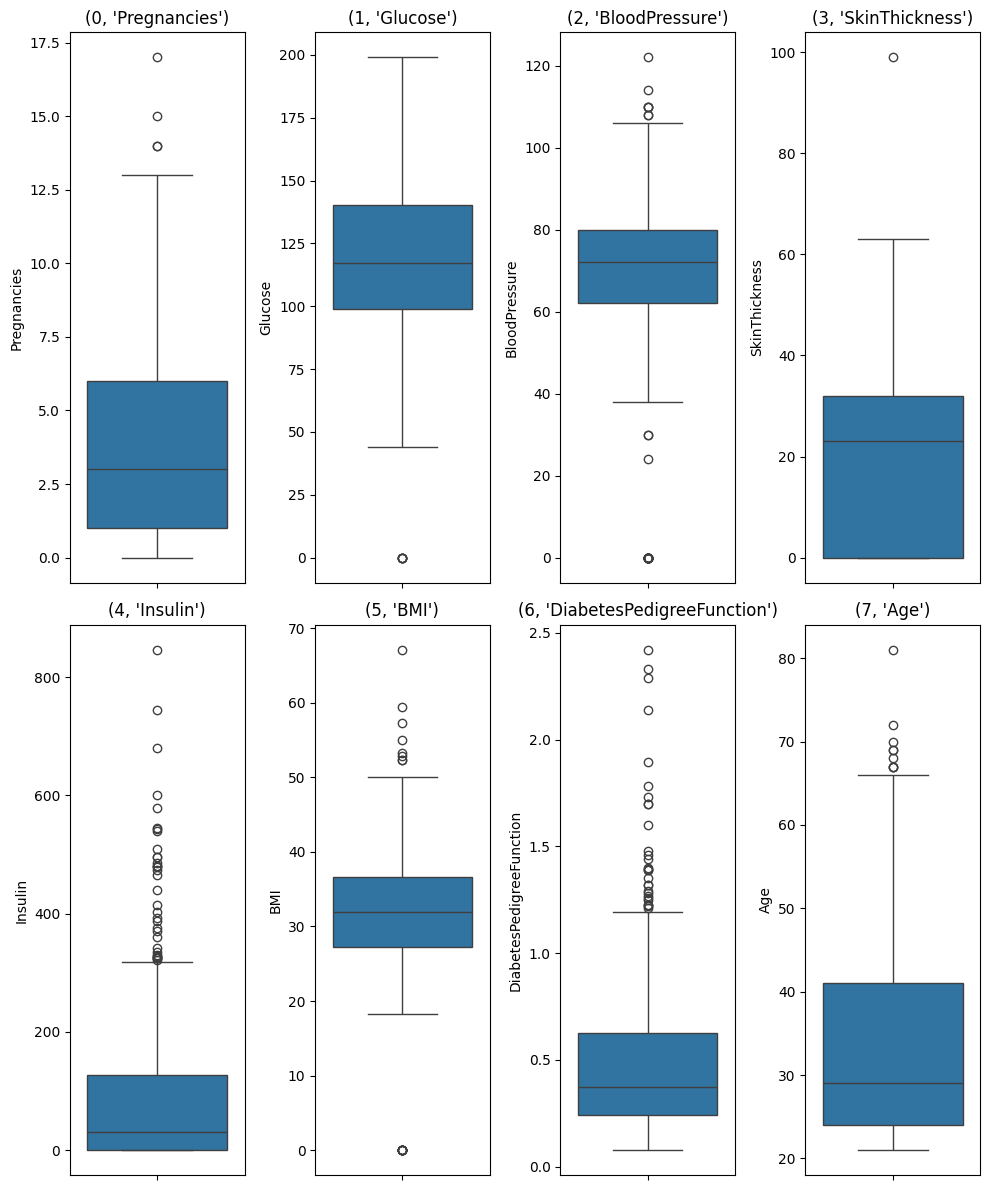

In [83]:
plt.figure(figsize=(10,12))
for i in list(enumerate(col.columns)):
    plt.subplot(2, 4, i[0]+1)
    sns.boxplot(col[i[1]])
    plt.title(i)
plt.tight_layout()
plt.show()

### Few investigation needed for all columns

In [78]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='BloodPressure'>

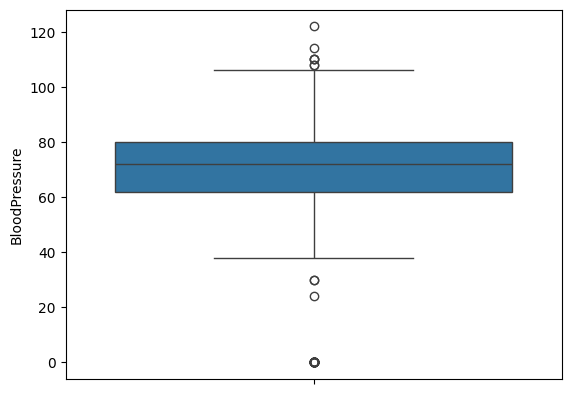

In [82]:
sns.boxplot(df['BloodPressure'])

In [97]:
Q1 = np.quantile(df['BloodPressure'],0.25)
Q3 = np.quantile(df['BloodPressure'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['BloodPressure'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    633
Outlier        135
Name: count, dtype: int64

In [98]:
Q1 = np.quantile(df['Glucose'],0.25)
Q3 = np.quantile(df['Glucose'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['Glucose'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    629
Outlier        139
Name: count, dtype: int64

In [99]:
Q1 = np.quantile(df['SkinThickness'],0.25)
Q3 = np.quantile(df['SkinThickness'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['SkinThickness'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    749
Outlier         19
Name: count, dtype: int64

In [100]:
Q1 = np.quantile(df['Insulin'],0.25)
Q3 = np.quantile(df['Insulin'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['Insulin'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    671
Outlier         97
Name: count, dtype: int64

In [101]:
Q1 = np.quantile(df['BMI'],0.25)
Q3 = np.quantile(df['BMI'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['BMI'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    629
Outlier        139
Name: count, dtype: int64

In [102]:
Q1 = np.quantile(df['DiabetesPedigreeFunction'],0.25)
Q3 = np.quantile(df['DiabetesPedigreeFunction'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['DiabetesPedigreeFunction'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    671
Outlier         97
Name: count, dtype: int64

In [103]:
Q1 = np.quantile(df['Age'],0.25)
Q3 = np.quantile(df['Age'],0.75)
IQR = Q3 - Q1
IQR
low = Q3 - IQR*1.5
high =  Q1 + IQR*1.5
#print(high,low)
df['Flag'] = df['Age'].apply(lambda x: 'Not Outlier' if low < x < high else 'Outlier')
df['Flag'].value_counts()

Flag
Not Outlier    679
Outlier         89
Name: count, dtype: int64

### We have Outliers in our data using IQR technique

In [105]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Flag'],
      dtype='object')

In [128]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 

(514, 8) (514,) (254, 8) (254,)


<Axes: >

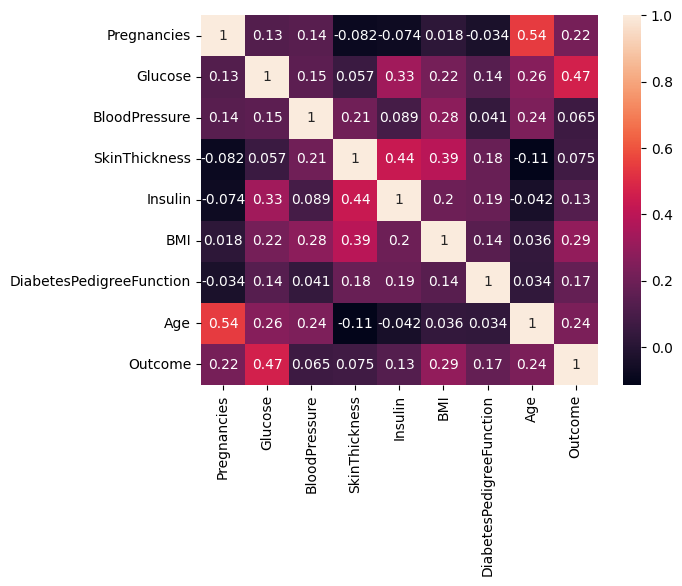

In [189]:
new_df = df.drop('Flag',axis=1)
sns.heatmap(new_df.corr(),annot=True)

<Axes: >

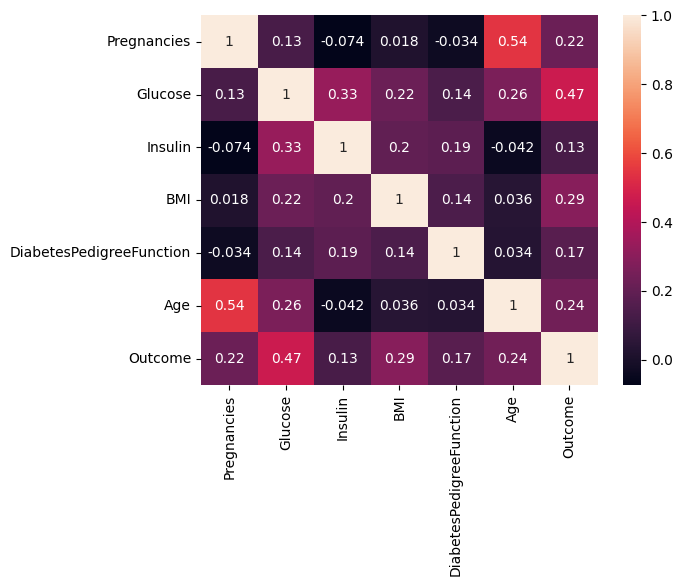

In [191]:
df1 = new_df.drop(['SkinThickness','BloodPressure'],axis=1)
sns.heatmap(df1.corr(),annot=True)

In [193]:
y = df1['Outcome']
x = df1.drop(['Outcome'],axis=1)

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=20)

### Standardization

In [196]:
ss = StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_test_s = ss.transform(x_test)

Accuracy Score: 0.7795275590551181
Roc AUC Score: 0.7184527584020292
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       171
           1       0.71      0.54      0.62        83

    accuracy                           0.78       254
   macro avg       0.76      0.72      0.73       254
weighted avg       0.77      0.78      0.77       254



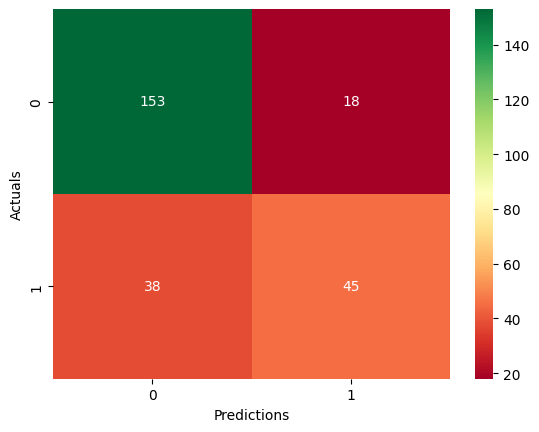

In [195]:
mod = LogisticRegression(max_iter=200)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Scaling has no role to play, lets try Power Transform

In [198]:
pt = PowerTransformer()
x_train_pt = pt.fit_transform(x_train)
x_test_pt = pt.transform(x_test)

Accuracy Score: 0.7834645669291339
Roc AUC Score: 0.7244768547875714
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       171
           1       0.72      0.55      0.63        83

    accuracy                           0.78       254
   macro avg       0.76      0.72      0.74       254
weighted avg       0.78      0.78      0.78       254



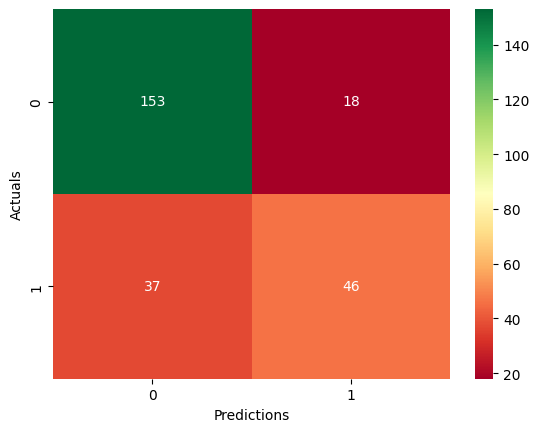

In [199]:
mod = LogisticRegression(max_iter=200)
mod.fit(x_train_pt,y_train)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [200]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform on power transformed data
x_over, y_over = oversample.fit_resample(x_train_pt, y_train)

# summarize class distribution
print(x_over.shape,y_over.shape)
print(y_over.value_counts())

(658, 6) (658,)
Outcome
0    329
1    329
Name: count, dtype: int64


Accuracy Score: 0.7677165354330708
Roc AUC Score: 0.7654829845698583
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       171
           1       0.62      0.76      0.68        83

    accuracy                           0.77       254
   macro avg       0.74      0.77      0.75       254
weighted avg       0.79      0.77      0.77       254



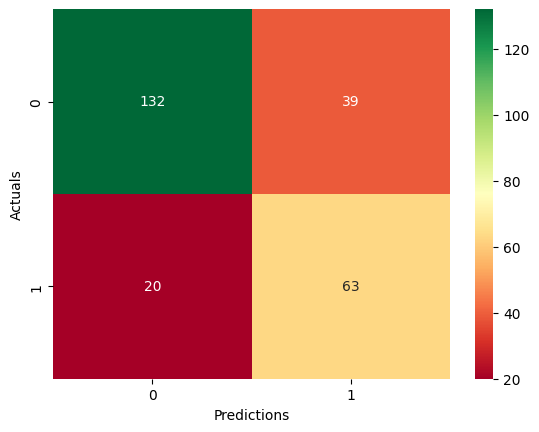

In [201]:
mod = LogisticRegression(max_iter=200)
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7755905511811023
Roc AUC Score: 0.7589304586768126
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       171
           1       0.64      0.71      0.67        83

    accuracy                           0.78       254
   macro avg       0.75      0.76      0.75       254
weighted avg       0.78      0.78      0.78       254



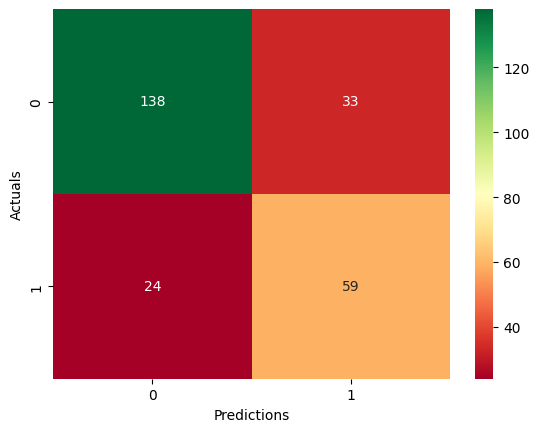

In [202]:
mod = RandomForestClassifier()
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy Score: 0.7755905511811023
Roc AUC Score: 0.7341295004579723
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       171
           1       0.67      0.61      0.64        83

    accuracy                           0.78       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.77      0.78      0.77       254



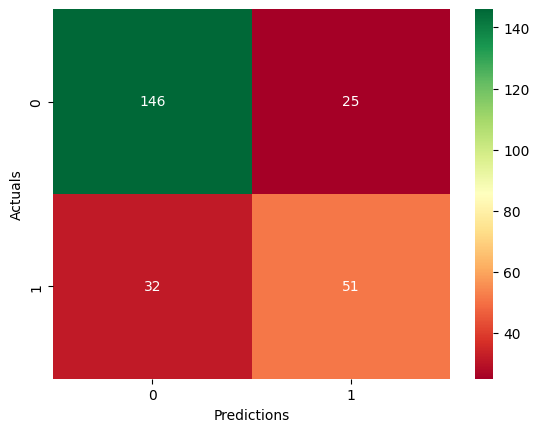

In [203]:
mod = XGBClassifier()
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [204]:
# define SMOTE strategy
sm = SMOTE()
# fit and apply the transform
x_train_Smote, y_train_Smote= sm.fit_resample(x_train_pt, y_train) 
# summarize class distribution
print(x_train_Smote.shape,y_train_Smote.shape)
print(y_train_Smote.value_counts())

(658, 6) (658,)
Outcome
0    329
1    329
Name: count, dtype: int64


Accuracy Score: 0.7598425196850394
Roc AUC Score: 0.753434791798774
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       171
           1       0.61      0.73      0.67        83

    accuracy                           0.76       254
   macro avg       0.73      0.75      0.74       254
weighted avg       0.78      0.76      0.76       254



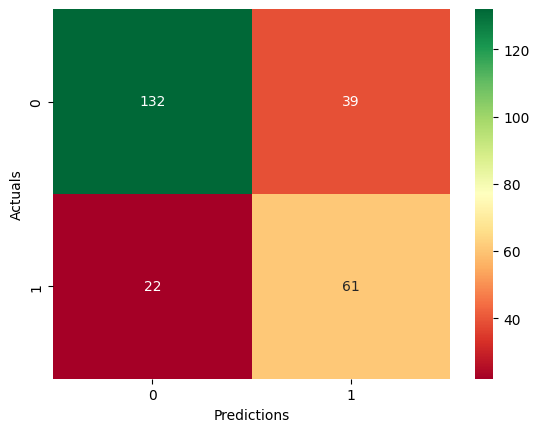

In [205]:
mod = LogisticRegression(max_iter=200)
mod.fit(x_train_Smote,y_train_Smote)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy Score: 0.7559055118110236
Roc AUC Score: 0.7288099767491019
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       171
           1       0.62      0.65      0.64        83

    accuracy                           0.76       254
   macro avg       0.72      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



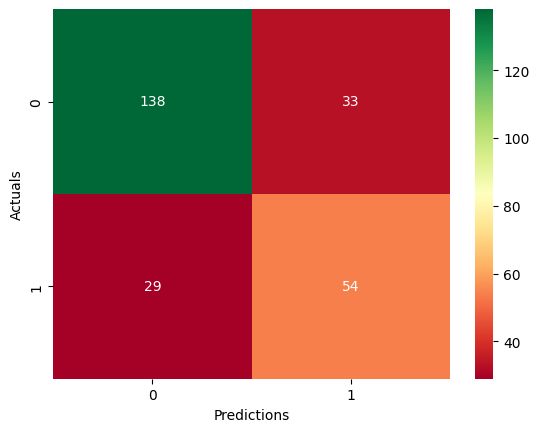

In [206]:
mod = XGBClassifier()
mod.fit(x_train_Smote,y_train_Smote)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [207]:
# Hyper Parameter Optimization

params = {
    "learning_rate":    [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth":        [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma":            [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]    
}


In [208]:
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [209]:
grid_search = GridSearchCV(clf, param_grid=params, n_jobs=-1, scoring = 'roc_auc', cv=5, verbose=3)
grid_search.fit(x_train_Smote,y_train_Smote)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='roc_auc', verbose=3)

In [210]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [211]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 5}

In [213]:
# Hyper Parameter Optimization
# These parameters are leveraged below to get no of trees
params1 = {
    "n_estimators":range(60,180,20)
         }
clf1 = XGBClassifier(colsample_bytree = 0.7, gamma=0.1, learning_rate = 0.05, max_depth=12, min_child_weight=5)
grid_search1 = GridSearchCV(clf1, param_grid=params1, n_jobs=-1, scoring = 'roc_auc', cv=5, verbose=3)
grid_search1.fit(x_train_Smote,y_train_Smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=12,
                                     max_leaves=None, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(60, 180, 20)},
             scoring='roc_auc', verbose=3)

In [214]:
grid_search1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [215]:
grid_search1.best_params_

{'n_estimators': 100}

Accuracy Score: 0.7755905511811023
Roc AUC Score: 0.7527302191221025
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       171
           1       0.65      0.69      0.67        83

    accuracy                           0.78       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.78      0.78      0.78       254



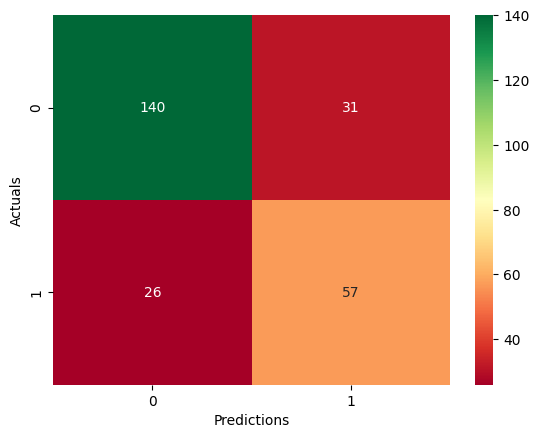

In [216]:
#Evaluate XGboost model
# fit model on training data
mod = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bytree=0.7,
              gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=5, 
              n_estimators=100, n_jobs=-1,objective='binary:logistic', random_state=26)
mod.fit(x_train_Smote, y_train_Smote)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGboost roc_value: 0.5083844148523919
XGBoost threshold: 0.2140754908323288
ROC for the test dataset 50.8%
FPR:  [0.         0.00584795 0.01169591 0.01169591 0.05263158 0.06432749
 0.06432749 0.07017544 0.07017544 0.0877193  0.09356725 0.18128655
 0.1871345  0.20467836 0.20467836 0.22222222 0.22222222 0.22807018
 0.22807018 0.23391813 0.25146199 0.28654971 0.28654971 0.32748538
 0.33333333 0.34502924 0.34502924 0.35672515 0.35672515 0.37426901
 0.37426901 0.38011696 0.41520468 0.41520468 0.42690058 0.43274854
 0.44444444 0.47368421 0.49707602 0.50877193 0.51461988 0.52631579
 0.5380117  0.54385965 0.54385965 0.5497076  0.55555556 0.55555556
 0.56725146 0.59649123 0.61988304 0.61988304 0.63157895 0.67836257
 0.67836257 0.70175439 0.70760234 0.71929825 0.73684211 0.74269006
 0.74269006 0.74853801 0.74853801 0.78362573 0.78362573 0.80116959
 0.8128655  0.81871345 0.81871345 0.8245614  0.83625731 0.86549708
 0.88304094 0.88888889 0.88888889 0.89473684 0.90643275 0.92982456
 0.93567251 0.95

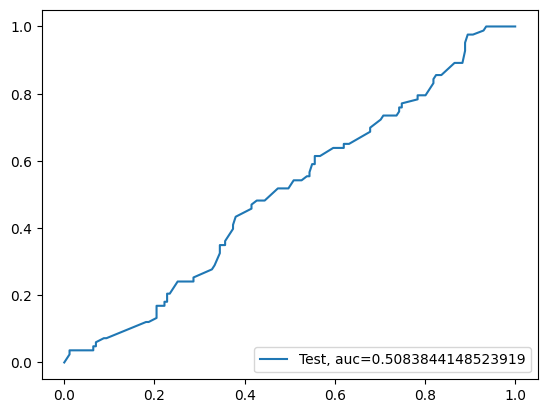

In [217]:
#### Print the FPR,TPR & select the best threshold from the roc curve
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
print("FPR: ",fpr)
print("TPR: ",tpr)
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [218]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.5083844148523919
XGBoost threshold: 0.2140754908323288


Accuracy Score: 0.7677165354330708
Roc AUC Score: 0.7375819065736631
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       171
           1       0.64      0.65      0.65        83

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



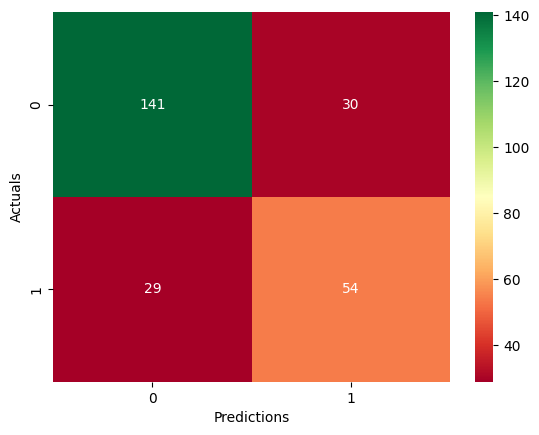

In [231]:
rf = RandomForestClassifier()
rf.fit(x_train_Smote, y_train_Smote)
y_pred = rf.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7598425196850394
Roc AUC Score: 0.753434791798774
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       171
           1       0.61      0.73      0.67        83

    accuracy                           0.76       254
   macro avg       0.73      0.75      0.74       254
weighted avg       0.78      0.76      0.76       254



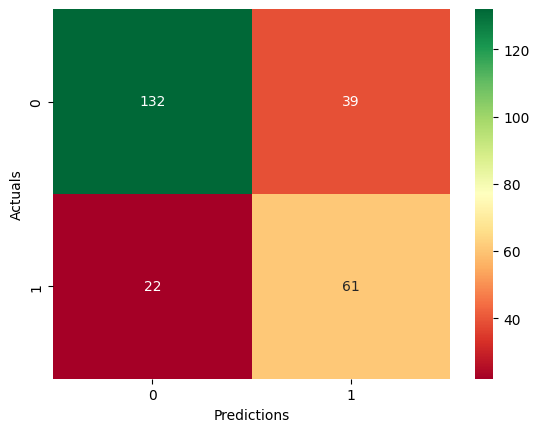

In [229]:
mod = LogisticRegression(max_iter=200)
mod.fit(x_train_Smote, y_train_Smote)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Seems Logistic proves to be better among all
### Export using Pickle

In [230]:
import pickle
pickle.dump(mod,open('model.pkl','wb'))